# Proyecto shark attacks Ironhack:

-Analisis de mis datos y graficos de apoyo (comprobación hipotesis)

Sergio Molina Biaggini

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
shark2 = pd.read_csv('../work/shark_limpio.csv',encoding = "ISO-8859-1")

In [4]:
shark2.sample(5)
#Compruebo si se ha cargado correctamente mi archivo ya limpio, 

,Year,Type,Country,Activity,Sex,Fatal,Sharks,Month
861,2004,UNPROVOKED,AUSTRALIA,Surfing,Male,NO,Other sharks,oct
1137,1999,UNPROVOKED,SOUTH AFRICA,Surfing,Male,NO,White shark,jul
323,2013,UNPROVOKED,AUSTRALIA,Diving for crayfish,Male,NO,White shark,oct
892,2004,UNPROVOKED,USA,Surfing,Male,YES,Other sharks,apr
2030,1958,UNPROVOKED,AMERICAN SAMOA,Cleaning hull of ship,Male,YES,Other sharks,dec


In [5]:
#h1-los tiburones son mas agresivos en verano y descansan en invierno(meses) 
#h2-los tiburones blancos tienen mala fama pero no son los peores - salvar 
#h3-que pais mas ataques , o son mas locos 
#h4-typo ataque mas comunes

<AxesSubplot:ylabel='Sex'>

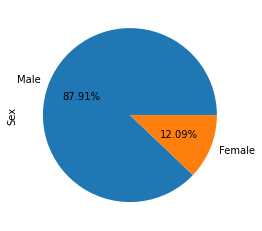

In [6]:
shark2[shark2['Sex'].notnull()].shape[0]
shark3 = shark2['Sex'].value_counts(normalize=True)*100
shark3.plot.pie(autopct='%1.2f%%')
#Ataques por genero 

<AxesSubplot:>

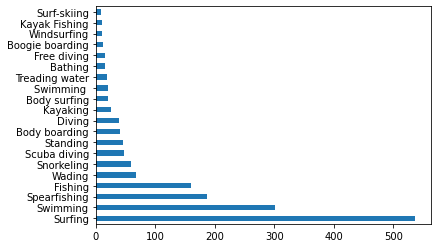

In [7]:
shark2['Activity'].value_counts().head(20).plot(kind='barh')

<AxesSubplot:ylabel='Type'>

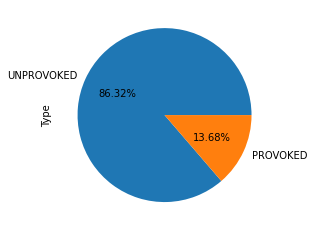

In [8]:
shark2['Type'].value_counts().head(2).plot.pie(autopct='%1.2f%%')

Text(0.5, 1.0, 'Shark attacks by season')

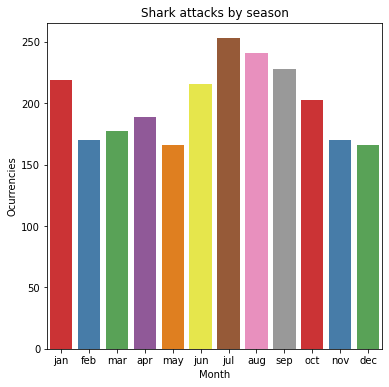

In [9]:
%matplotlib inline
plt.figure(figsize=[6,6])
graph1 = sns.countplot(x='Month', data=shark2, palette='Set1',order= ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
plt.xlabel('Month')
plt.ylabel ('Ocurrencies')
plt.title('Shark attacks by season')

Text(0.5, 1.0, 'Shark attacks by type')

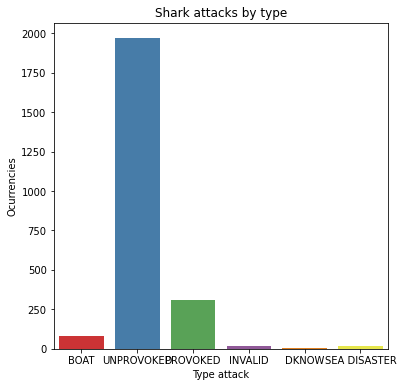

In [10]:
%matplotlib inline
plt.figure(figsize=[6,6])
graph2 = sns.countplot(x='Type', data=shark2, palette='Set1')
plt.xlabel('Type attack')
plt.ylabel ('Ocurrencies')
plt.title('Shark attacks by type')

<AxesSubplot:ylabel='Fatal'>

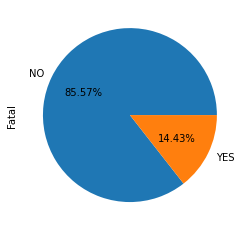

In [11]:
shark2[shark2['Fatal'].notnull()].shape[0]
shark4 = shark2['Fatal'].value_counts(normalize=True)*100
shark4.plot.pie(autopct='%1.2f%%')

In [12]:
attacks_country = shark2['Country'].value_counts().to_frame().reset_index()
attacks_country.columns = ['countries','attacks']
#attacks_by_country['name'].replace('USA','UNITED STATES OF AMERICA',inplace=True)
attacks_country.head(10)

,countries,attacks
0,USA,1014
1,AUSTRALIA,561
2,SOUTH AFRICA,297
3,BAHAMAS,58
4,NEW ZEALAND,50
5,PAPUA NEW GUINEA,28
6,BRAZIL,28
7,REUNION,26
8,MEXICO,19
9,EGYPT,19


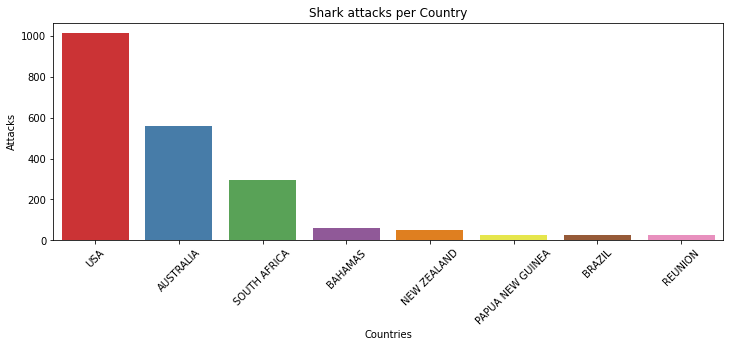

In [16]:
graph4 = plt.figure(figsize=(12,4))
graph4 = sns.barplot(x='countries',y='attacks', data=attacks_country.head(8), palette='Set1');
plt.xlabel('Countries')
plt.ylabel ('Attacks')
plt.title('Shark attacks per Country')
plt.xticks(rotation=45);

Text(0.5, 1.0, 'Shark attacks during years')

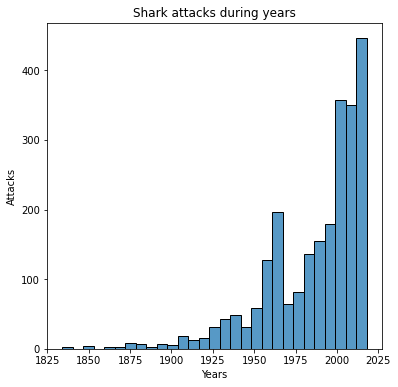

In [17]:
#%matplotlib inline
plt.figure(figsize=(6,6))
graph3 = sns.histplot(x='Year', data=shark2, palette='Set1')
plt.xlabel('Years')
plt.ylabel ('Attacks')
plt.title('Shark attacks during years')


In [18]:
shark2


,Year,Type,Country,Activity,Sex,Fatal,Sharks,Month
0,2018,BOAT,USA,Paddling,Female,NO,White shark,jun
1,2018,UNPROVOKED,AUSTRALIA,Surfing,Male,NO,Other sharks,jun
2,2018,PROVOKED,MEXICO,Free diving,Male,NO,Other sharks,jun
3,2018,UNPROVOKED,BRAZIL,Swimming,Male,YES,Other sharks,jun
4,2018,UNPROVOKED,USA,Fishing,Male,NO,Other sharks,may
...,...,...,...,...,...,...,...,...
2393,1852,SEA DISASTER,SOUTH AFRICA,Wreck of the steamship Birkenhead,Male,YES,White shark,feb
2394,1852,UNPROVOKED,NEW ZEALAND,Swimming,Male,YES,Other sharks,jan
2395,1840,UNPROVOKED,USA,Accidentally thrown overboard & treading water...,Male,YES,Other sharks,jul
2396,1839,UNPROVOKED,CUBA,Sitting on gunwale of boat,Male,YES,Other sharks,apr
